In [1]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn import preprocessing
import os
import csv

In [2]:
# importing database
df = pd.read_csv('data/SimulatorDatabase.csv') #no need for (sep=';', quotechar='"')
df.head()

,startNum,gVScRatio,lifespanSkinCells,civiliansProductivity,guardsProductivity,armyPriority,bacteriaStartPercent,takingFoodEffectivity,lifespanBacteria,chanceOfKillingGuard,chanceOfKillingCivilian,numOfRounds,result
0,536,0.11,3,2,3,0.36,0.68,0.63,2,11,89,2,1
1,228,0.14,1,4,3,0.33,0.47,0.43,1,25,53,3,1
2,321,0.13,3,4,2,0.48,0.69,0.27,0,48,16,1,1
3,527,0.18,1,1,2,0.28,0.92,0.32,2,5,49,6,0
4,726,0.37,2,1,2,0.73,0.48,0.69,0,47,84,1,0


<h3> Data Analysis </h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   startNum                 1900 non-null   int64  
 1   gVScRatio                1900 non-null   float64
 2   lifespanSkinCells        1900 non-null   int64  
 3   civiliansProductivity    1900 non-null   int64  
 4   guardsProductivity       1900 non-null   int64  
 5   armyPriority             1900 non-null   float64
 6   bacteriaStartPercent     1900 non-null   float64
 7   takingFoodEffectivity    1900 non-null   float64
 8   lifespanBacteria         1900 non-null   int64  
 9   chanceOfKillingGuard     1900 non-null   int64  
 10  chanceOfKillingCivilian  1900 non-null   int64  
 11  numOfRounds              1900 non-null   int64  
 12  result                   1900 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 193.1 KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
startNum,1900.0,526.356316,271.062169,50.00,287.00,526.50,755.00,1000.0
gVScRatio,1900.0,0.277216,0.134234,0.05,0.16,0.28,0.40,0.5
lifespanSkinCells,1900.0,1.991579,0.813869,1.00,1.00,2.00,3.00,3.0
civiliansProductivity,1900.0,3.022632,1.421646,1.00,2.00,3.00,4.00,5.0
guardsProductivity,1900.0,1.989474,0.827321,1.00,1.00,2.00,3.00,3.0
armyPriority,1900.0,0.500342,0.236374,0.10,0.30,0.50,0.71,0.9
bacteriaStartPercent,1900.0,0.602011,0.230785,0.20,0.41,0.60,0.80,1.0
takingFoodEffectivity,1900.0,0.499242,0.234775,0.10,0.30,0.50,0.70,0.9
lifespanBacteria,1900.0,0.982632,0.819209,0.00,0.00,1.00,2.00,2.0
chanceOfKillingGuard,1900.0,25.664211,14.697615,1.00,13.00,26.00,38.00,50.0


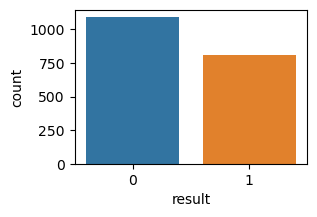

In [5]:
plt.figure(figsize = (3,2))
sns.countplot(x='result',data=df);

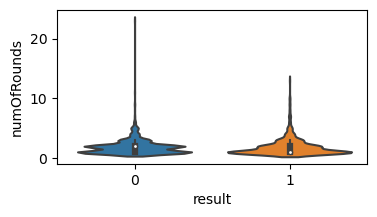

In [6]:
plt.figure(figsize = (4,2))
sns.violinplot(x='result',y='numOfRounds',data=df);

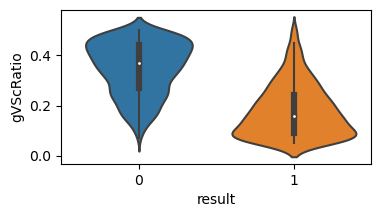

In [7]:
plt.figure(figsize = (4,2))
sns.violinplot(x='result',y='gVScRatio',data=df);

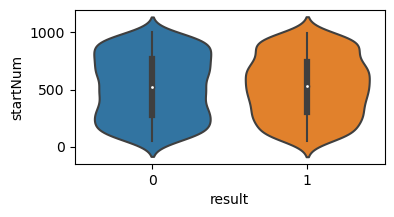

In [8]:
plt.figure(figsize = (4,2))
sns.violinplot(x='result',y='startNum',data=df);

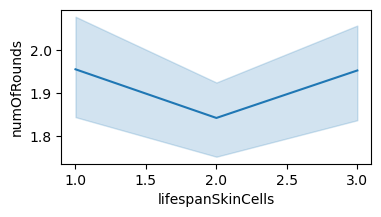

In [9]:
plt.figure(figsize = (4,2))
sns.lineplot(x='lifespanSkinCells', y='numOfRounds', data=df);

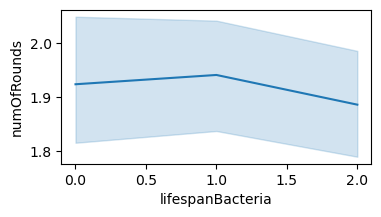

In [10]:
plt.figure(figsize = (4,2))
sns.lineplot(x='lifespanBacteria', y='numOfRounds', data=df);

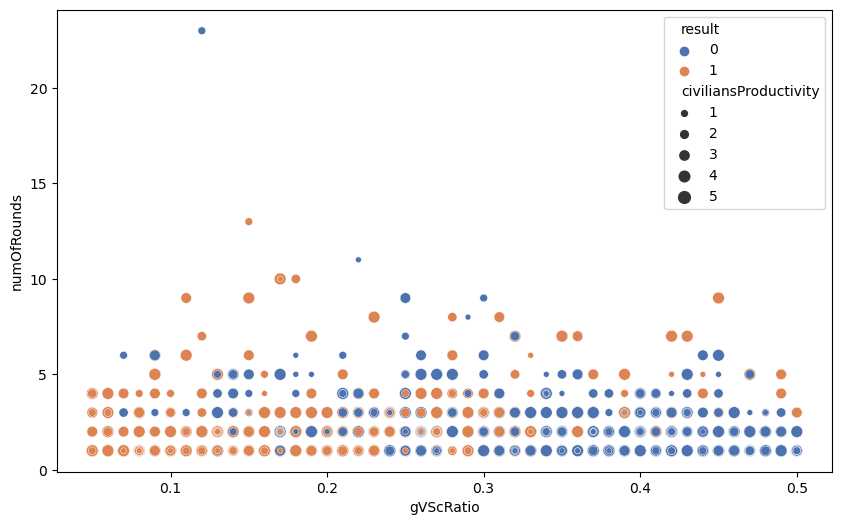

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gVScRatio',y='numOfRounds',data=df,hue='result',size='civiliansProductivity',palette='deep');

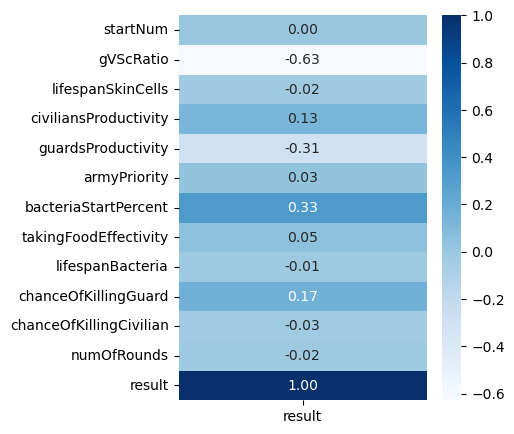

In [12]:
# corelation
plt.figure(figsize = (4,5))
corr = df.corr()[['result']]
sns.heatmap(corr,annot=True,cmap='Blues',fmt='.2f'); 

In [13]:
df.corr()[['result']]

,result
startNum,0.001678
gVScRatio,-0.627974
lifespanSkinCells,-0.018574
civiliansProductivity,0.126374
guardsProductivity,-0.308261
armyPriority,0.033263
bacteriaStartPercent,0.327766
takingFoodEffectivity,0.048498
lifespanBacteria,-0.012955
chanceOfKillingGuard,0.166663


<h2> Prepare train and test data for NN </h2>

In [14]:
data = df.apply(pd.to_numeric)
data.describe()

,startNum,gVScRatio,lifespanSkinCells,civiliansProductivity,guardsProductivity,armyPriority,bacteriaStartPercent,takingFoodEffectivity,lifespanBacteria,chanceOfKillingGuard,chanceOfKillingCivilian,numOfRounds,result
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,526.356316,0.277216,1.991579,3.022632,1.989474,0.500342,0.602011,0.499242,0.982632,25.664211,50.241053,1.916842,0.425263
std,271.062169,0.134234,0.813869,1.421646,0.827321,0.236374,0.230785,0.234775,0.819209,14.697615,28.888298,1.360091,0.494513
min,50.000000,0.050000,1.000000,1.000000,1.000000,0.100000,0.200000,0.100000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,287.000000,0.160000,1.000000,2.000000,1.000000,0.300000,0.410000,0.300000,0.000000,13.000000,25.000000,1.000000,0.000000
50%,526.500000,0.280000,2.000000,3.000000,2.000000,0.500000,0.600000,0.500000,1.000000,26.000000,50.000000,2.000000,0.000000
75%,755.000000,0.400000,3.000000,4.000000,3.000000,0.710000,0.800000,0.700000,2.000000,38.000000,75.000000,2.000000,1.000000
max,1000.000000,0.500000,3.000000,5.000000,3.000000,0.900000,1.000000,0.900000,2.000000,50.000000,100.000000,23.000000,1.000000


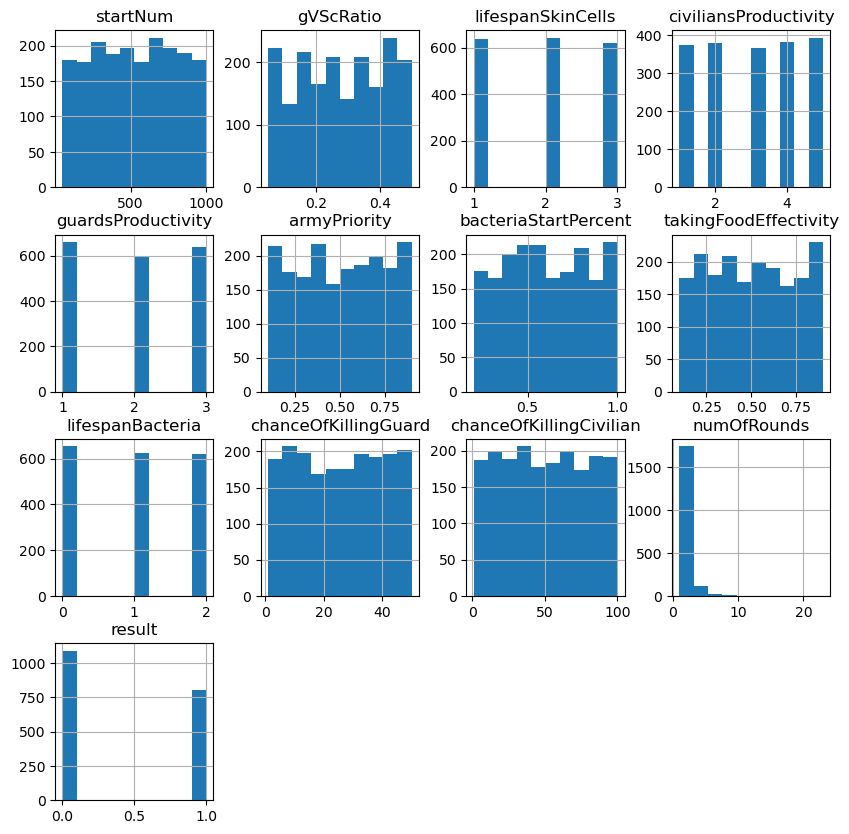

In [15]:
data.hist(figsize = (10, 10))
plt.show()

In [16]:
X = np.array(data.drop(['result', 'numOfRounds'],axis=1))
y = np.array(data['result'])

In [17]:
# data normalization
mean = X.mean(axis=0) # mean along the columns
X -= mean
std = X.std(axis=0) # std along the columns
X /= std

In [18]:
# save normalization data in file

# nor_d_file = 'data/normalization_data.csv'
# with open(nor_d_file,mode = "w", newline='') as f: 
#     dbWriter = csv.writer(f, delimiter = ',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     dbWriter.writerow(['mean', 'std'])
#     for i in range (len(mean)):
#         dbWriter.writerow([mean[i], std[i]])

In [19]:
# creating train and test datasets
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=32, test_size = 0.2)

In [20]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(1520, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


<h2>Model building</h2>

In [21]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
from keras.layers import Dropout

def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 40, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    classifier.add(Dropout(0.35))
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(0.15))
    classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

model = build_classifier()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                480       
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                656       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 1,170
Trainable params: 1,170
Non-trainable params: 0
_________________________________________________________________
None


<h3>Feed data into model</h3>

In [22]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=20)

Epoch 1/50
76/76 [==============================] - 1s 4ms/step - loss: 0.6785 - accuracy: 0.6618 - val_loss: 0.6207 - val_accuracy: 0.8974
Epoch 2/50
76/76 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.9164 - val_loss: 0.2476 - val_accuracy: 0.9079
Epoch 3/50
76/76 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9178 - val_loss: 0.1977 - val_accuracy: 0.9026
Epoch 4/50
76/76 [==============================] - 0s 2ms/step - loss: 0.1827 - accuracy: 0.9289 - val_loss: 0.1968 - val_accuracy: 0.9079
Epoch 5/50
76/76 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.9289 - val_loss: 0.1942 - val_accuracy: 0.9053
Epoch 6/50
76/76 [==============================] - 0s 2ms/step - loss: 0.1721 - accuracy: 0.9276 - val_loss: 0.1956 - val_accuracy: 0.9026
Epoch 7/50
76/76 [==============================] - 0s 2ms/step - loss: 0.1675 - accuracy: 0.9263 - val_loss: 0.1923 - val_accuracy: 0.9105
Epoch 8/50
76/76 [==

<h4>Checking model's accuracy</h4>

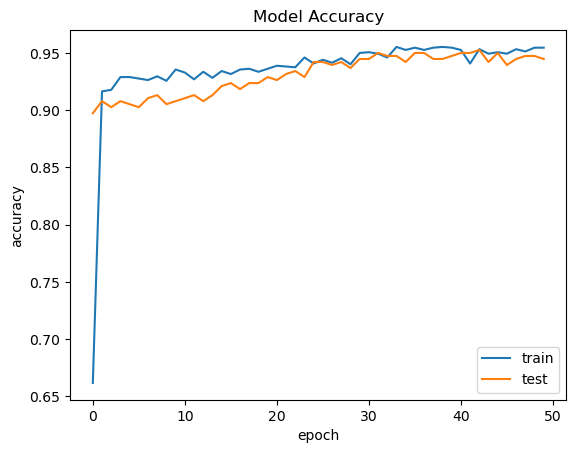

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

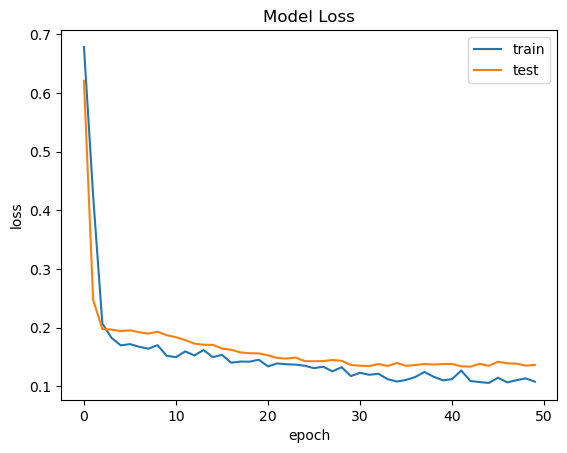

In [24]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [25]:
# saving the model

# model.save('models/version_0.4')